In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import glob
import scipy
import re
import functools as ft


In [4]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 9
cm = 1/2.54
fig_folder = './Figure_1_exports'
data_folder = '../all_data/Figure_1_data'


### Data comes from experiment eCM327

In [5]:
exp_data = pd.read_excel('/'.join([data_folder,'WCE_comparison.xlsx'])).drop(columns=['Unnamed: 0'])
exp_data

,experiment_id,plate,well_name,deGFP,K,Mg,WCE,Supp,GFP,day
0,eCM327,1,A1,5,185,8,BL64,S25,825943,1
1,eCM327,1,A2,5,135,12,BL64,S25,1427753,1
2,eCM327,1,A3,5,85,10,BL64,S25,1280050,1
3,eCM327,1,A4,5,185,8,BL65,S25,797727,1
4,eCM327,1,A6,5,85,10,BL65,S25,1404439,1
...,...,...,...,...,...,...,...,...,...,...
82,eCM327,1,O5,5,135,16,BL65,S25,1489144,1
83,eCM327,1,P1,5,185,12,BL64,S25,1374193,1
84,eCM327,1,P2,5,135,12,BL64,S25,1537873,1
85,eCM327,1,P4,5,185,12,BL65,S25,1598970,1


In [6]:
exp_data.value_counts(['Mg','K','WCE'])

Mg  K    WCE 
8   85   BL64    3
         BL65    3
16  185  BL64    3
    135  BL65    3
         BL64    3
    85   BL65    3
         BL64    3
14  185  BL65    3
         BL64    3
    135  BL65    3
         BL64    3
    85   BL65    3
         BL64    3
12  185  BL65    3
         BL64    3
16  185  BL65    3
12  135  BL64    3
    85   BL64    3
10  185  BL65    3
    135  BL65    3
         BL64    3
    85   BL65    3
         BL64    3
8   185  BL65    3
         BL64    3
    135  BL65    3
         BL64    3
12  85   BL65    2
10  185  BL64    2
12  135  BL65    2
Name: count, dtype: int64

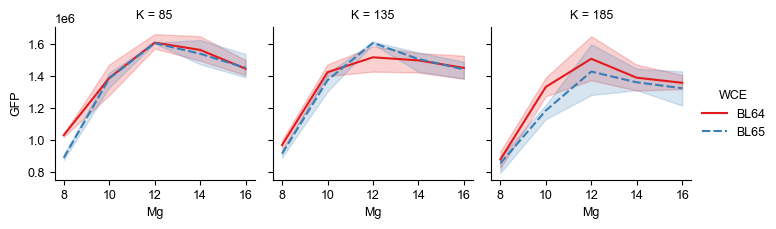

In [7]:
sns.relplot(data=exp_data,x='Mg',y='GFP',hue='WCE',style='WCE',col='K',kind='line',palette='Set1',height=6*cm)
# plt.savefig(f'{fig_folder}/Supp_fig-WCE_comparison.svg',format='svg',dpi=300)

plt.show()

In [8]:
means = exp_data[['Mg','K','GFP']].groupby(['Mg','K']).agg(np.mean)
stdevs = exp_data[['Mg','K','GFP']].groupby(['Mg','K']).agg(np.std)
cvs = stdevs / means
cvs = cvs.reset_index()
cvs['GFP'] = cvs['GFP'] * 100

z_df = cvs.set_index(['K','Mg']).unstack()
z_df.columns = [8,10,12,14,16]
z_df

C:\Users\conar\AppData\Local\Temp\ipykernel_13228\1239070241.py:1: FutureWarning: The provided callable <function mean at 0x000001ECCF6AF240> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  means = exp_data[['Mg','K','GFP']].groupby(['Mg','K']).agg(np.mean)
C:\Users\conar\AppData\Local\Temp\ipykernel_13228\1239070241.py:2: FutureWarning: The provided callable <function std at 0x000001ECCF6AF380> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  stdevs = exp_data[['Mg','K','GFP']].groupby(['Mg','K']).agg(np.std)


,8,10,12,14,16
K,,,,,
85,8.121206,5.007496,2.091675,4.550954,3.958140
135,3.993702,3.899405,4.866335,4.015623,3.936872
185,5.581558,7.754653,9.560707,5.139083,5.629638


In [9]:
cvs['GFP'].mean()

5.207136403288979

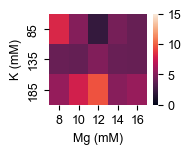

In [10]:
fig,ax = plt.subplots(figsize=[4*cm,3*cm])
sns.heatmap(z_df,vmin=0,vmax=15)
plt.xlabel('Mg (mM)')
plt.ylabel('K (mM)')
# plt.savefig(f'{fig_folder}/WCE_comparison.svg',format='svg',dpi=300)

plt.show()

In [11]:
cvs['GFP'].max()

9.560706505802305